<a href="https://colab.research.google.com/github/nuralyyu/Tugas-Python/blob/main/Tugas_13_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#PATH LOSS COST231 FUNCTION
def cos(frek,tipe,ht,hr,d):
  #frek = frekuensi (MHz)
  #tipe = urban, suburban, open
  #ht = tinggi tower (meter)
  #hr = tinggi user (meter)
  #d = jarak (meter)
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [3]:
f1=1800 #MHz
f2=900
f3=700
loc1='urban'
loc2='suburban'
loc3='open'
tower=80 #m
user=1.5 #m
dmin=200 #m
dmax=700 #m
N=200 #titik
d=np.random.randint(dmin,dmax,N)

In [4]:
print(d)

[357 518 433 295 251 206 662 327 273 444 464 686 495 480 433 554 424 441
 584 691 560 230 513 523 687 431 693 512 568 377 400 232 417 205 492 492
 339 363 590 631 256 662 473 387 285 437 226 285 292 580 399 561 285 681
 366 521 356 418 564 583 478 239 284 667 507 560 594 414 542 249 689 362
 691 296 415 597 291 371 365 318 544 443 396 464 544 242 263 479 372 310
 507 470 293 329 629 508 212 589 693 213 228 210 460 350 330 287 251 391
 254 441 383 215 327 692 402 220 293 446 512 203 514 503 302 497 673 446
 676 406 235 572 603 218 342 642 283 569 619 604 233 562 600 600 642 390
 372 631 337 418 609 304 358 270 291 375 643 305 475 442 545 274 344 396
 267 462 588 593 542 613 471 543 443 294 437 457 599 483 340 643 646 674
 502 361 515 563 463 547 348 357 661 346 473 485 297 491 616 530 605 352
 276 338]


In [5]:
#COST 231 DEF
LpUrban1 = cos(f1,loc1,tower,user,d)
LpUrban2 = cos(f2,loc1,tower,user,d)
LpUrban3 = cos(f3,loc1,tower,user,d)
LpSubUrban = cos(f1,loc2,tower,user,d)
LpOpen = cos(f1,loc3,tower,user,d)

In [6]:
#Sorting Array
d_sort=d[np.argsort(d)]
Urban1_sort=LpUrban1[np.argsort(d)]
Urban2_sort=LpUrban2[np.argsort(d)]
Urban3_sort=LpUrban3[np.argsort(d)]
SubUrban_sort=LpSubUrban[np.argsort(d)]
Open_sort=LpOpen[np.argsort(d)]

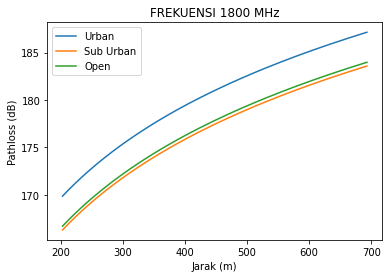

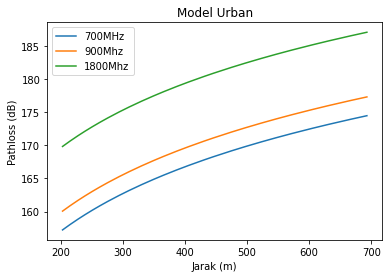

In [7]:
#Summarize Graph for F = 1800MHz
plt.plot(d_sort,Urban1_sort)
plt.plot(d_sort,SubUrban_sort)
plt.plot(d_sort,Open_sort)
plt.title('FREKUENSI 1800 MHz')
plt.ylabel('Pathloss (dB)')
plt.xlabel('Jarak (m)')
plt.legend(['Urban', 'Sub Urban', 'Open'], loc='upper left')
plt.show()

#Summarize Graph for Urban Location
plt.plot(d_sort,Urban3_sort)
plt.plot(d_sort,Urban2_sort)
plt.plot(d_sort,Urban1_sort)
plt.title('Model Urban')
plt.ylabel('Pathloss (dB)')
plt.xlabel('Jarak (m)')
plt.legend(['700MHz', '900Mhz', '1800Mhz'], loc='upper left')
plt.show()